Step-1 Importing the Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split#(80%training/20%testing)
from sklearn import metrics
import statsmodels.api as sm
#for data visualization
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns 
sns.set(style='whitegrid')
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Step-2 Loading the Data

In [2]:
df = pd.read_csv("/content/DiamondsNew.csv")

Step-3 Visualizing the Data Frame

In [3]:
df.head(10)

,Unnamed: 0,cut,clarity,color,price,depth,carat,table,x,y,z
0,1,Ideal,SI2,E,326,61.5,0.23,55.0,3.95,3.98,2.43
1,2,Premium,SI1,E,326,59.8,0.21,61.0,3.89,3.84,2.31
2,3,Good,VS1,E,327,56.9,0.23,65.0,4.05,4.07,2.31
3,4,Premium,VS2,I,334,62.4,0.29,58.0,4.20,4.23,2.63
4,5,Good,SI2,J,335,63.3,0.31,58.0,4.34,4.35,2.75
5,6,Very Good,VVS2,J,336,62.8,0.24,57.0,3.94,3.96,2.48
6,7,Very Good,VVS1,I,336,62.3,0.24,57.0,3.95,3.98,2.47
7,8,Very Good,SI1,H,337,61.9,0.26,55.0,4.07,4.11,2.53
8,9,Fair,VS2,E,337,65.1,0.22,61.0,3.87,3.78,2.49
9,10,Very Good,VS1,H,338,59.4,0.23,61.0,4.00,4.05,2.39


Step-4 Exploring the Data

In [4]:
df.axes

[RangeIndex(start=0, stop=53940, step=1),
 Index(['Unnamed: 0', 'cut', 'clarity', 'color', 'price', 'depth', 'carat',
        'table', 'x', 'y', 'z'],
       dtype='object')]

In [5]:
df.columns

Index(['Unnamed: 0', 'cut', 'clarity', 'color', 'price', 'depth', 'carat',
       'table', 'x', 'y', 'z'],
      dtype='object')

In [6]:
df.dtypes

Unnamed: 0      int64
cut            object
clarity        object
color          object
price           int64
depth         float64
carat         float64
table         float64
x             float64
y             float64
z             float64
dtype: object

Step-5 Cleaning the data

In [7]:
#Deleting unnamed column 
df=df.drop(['Unnamed: 0'], axis=1)

In [8]:
df.head()

,cut,clarity,color,price,depth,carat,table,x,y,z
0,Ideal,SI2,E,326,61.5,0.23,55.0,3.95,3.98,2.43
1,Premium,SI1,E,326,59.8,0.21,61.0,3.89,3.84,2.31
2,Good,VS1,E,327,56.9,0.23,65.0,4.05,4.07,2.31
3,Premium,VS2,I,334,62.4,0.29,58.0,4.20,4.23,2.63
4,Good,SI2,J,335,63.3,0.31,58.0,4.34,4.35,2.75


In [9]:
df.describe()

,price,depth,carat,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,61.749405,0.797940,57.457184,5.731157,5.734526,3.538734
std,3989.439738,1.432621,0.474011,2.234491,1.121761,1.142135,0.705699
min,326.000000,43.000000,0.200000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,61.000000,0.400000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,61.800000,0.700000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,62.500000,1.040000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,79.000000,5.010000,95.000000,10.740000,58.900000,31.800000


In [10]:
#Checking for minimum values for each column
#since dimensions of a diamond cannot be 0 we will check for null or 0 values in x, y and z
df.columns

Index(['cut', 'clarity', 'color', 'price', 'depth', 'carat', 'table', 'x', 'y',
       'z'],
      dtype='object')

In [11]:
print("Number of rows with 0 value in x is {}".format((df.x==0).sum()))
print("Number of rows with 0 value in y is {}".format((df.y==0).sum()))
print("Number of rows with 0 value in z is {}".format((df.z==0).sum()))

Number of rows with 0 value in x is 8
Number of rows with 0 value in y is 7
Number of rows with 0 value in z is 20


In [12]:
#Checking for Nan Values
df.isnull().sum()

cut        0
clarity    0
color      0
price      0
depth      0
carat      0
table      0
x          0
y          0
z          0
dtype: int64

In [13]:
#replacing all 0 values by NaN
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)

In [14]:
#checking for null values 
df.isnull().sum()

cut         0
clarity     0
color       0
price       0
depth       0
carat       0
table       0
x           8
y           7
z          20
dtype: int64

In [15]:
#removing NaN values
df.dropna(inplace=True) 
df.isnull().sum()

cut        0
clarity    0
color      0
price      0
depth      0
carat      0
table      0
x          0
y          0
z          0
dtype: int64

In [16]:
df.head()

,cut,clarity,color,price,depth,carat,table,x,y,z
0,Ideal,SI2,E,326,61.5,0.23,55.0,3.95,3.98,2.43
1,Premium,SI1,E,326,59.8,0.21,61.0,3.89,3.84,2.31
2,Good,VS1,E,327,56.9,0.23,65.0,4.05,4.07,2.31
3,Premium,VS2,I,334,62.4,0.29,58.0,4.20,4.23,2.63
4,Good,SI2,J,335,63.3,0.31,58.0,4.34,4.35,2.75


In [17]:
#Removing extra variables
#Combing x ,y and z as one
df['volume'] = df['x']*df['y']*df['z']
df.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [18]:
df.head()

,cut,clarity,color,price,depth,carat,table,volume
0,Ideal,SI2,E,326,61.5,0.23,55.0,38.202030
1,Premium,SI1,E,326,59.8,0.21,61.0,34.505856
2,Good,VS1,E,327,56.9,0.23,65.0,38.076885
3,Premium,VS2,I,334,62.4,0.29,58.0,46.724580
4,Good,SI2,J,335,63.3,0.31,58.0,51.917250


In [19]:
df.describe()

,price,depth,carat,table,volume
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,3930.993231,61.749514,0.797698,57.456834,129.897567
std,3987.280446,1.432331,0.473795,2.234064,78.219789
min,326.000000,43.000000,0.200000,43.000000,31.707984
25%,949.000000,61.000000,0.400000,56.000000,65.189759
50%,2401.000000,61.800000,0.700000,57.000000,114.840180
75%,5323.250000,62.500000,1.040000,59.000000,170.846415
max,18823.000000,79.000000,5.010000,95.000000,3840.598060


In [20]:
#dropping columns with categorical values
df.drop(['cut','clarity','color'],axis=1,inplace=True)

In [21]:
#Plotting scatter plot using plotly amongst the IV and DV to check fro multicollinearity
fig = px.scatter_matrix(df)
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)
fig.show()

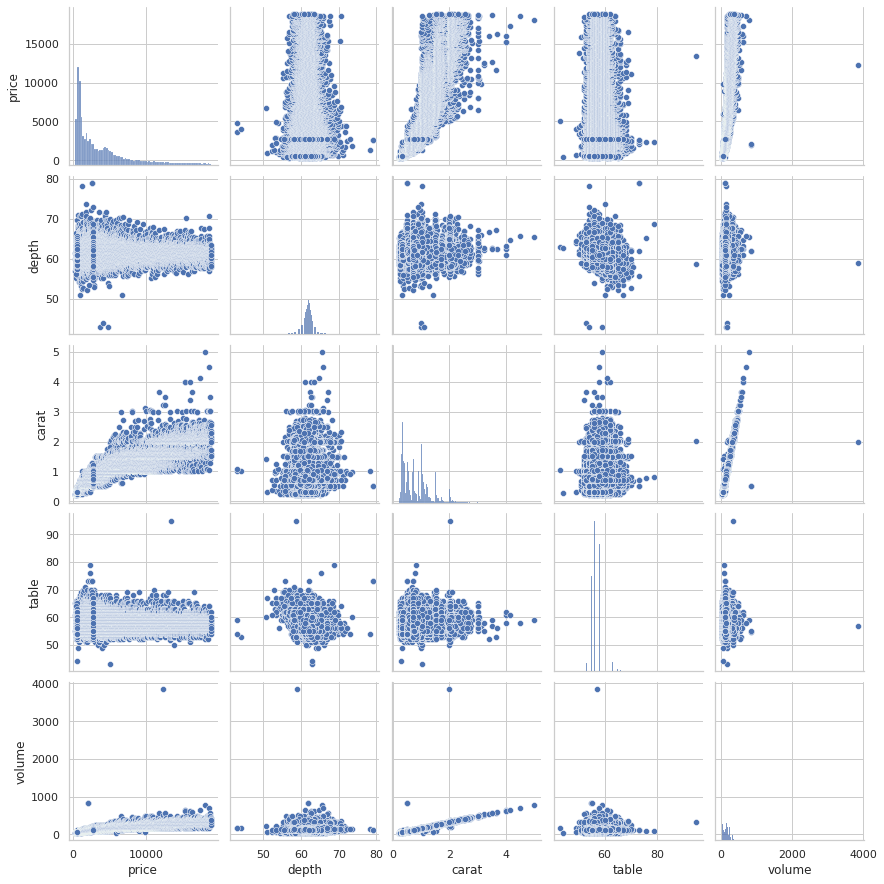

In [22]:
sns.pairplot(df)#Scatter plot grids in seaborn

If one of the individual scatterplots in the matrix shows a linear relationship between variables, this is an indication that those variables are exhibiting multicollinearity.


Checking for Multicollinearity using VIF


In [23]:
#To check that we will drop the dependent variable
df1= df.drop(['price'], axis=1) 
df1.head()

,depth,carat,table,volume
0,61.5,0.23,55.0,38.202030
1,59.8,0.21,61.0,34.505856
2,56.9,0.23,65.0,38.076885
3,62.4,0.29,58.0,46.724580
4,63.3,0.31,58.0,51.917250


In [24]:
#Detecting Multiocollinearity using builtin function for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant 

"""
variance_inflation_factor expects the presence of a constant in the matrix of
explanatory variables.
One can use add_constant from statsmodels to add the required constant to the 
dataframe before passing its values to the function.
"""

df1 = add_constant(df1)
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df1.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df1.values, i)
                          for i in range(len(df1.columns))]

print(vif_data)      

  feature          VIF
0   const  3593.268159
1   depth     1.117789
2   carat    23.821735
3   table     1.148397
4  volume    23.614330




*   Generally, a VIF above 4  indicates that multicollinearity might exist, and further investigation is required.
*    When VIF is higher than 10 there is significant multicollinearity that needs to be corrected.

We can see that there is a strong correlation between carat and volume.
 Hence we drop volume column from our independent variable list


*    **Why volume and not carat?**

*   Carat : Carat weight of the Diamond.
*   Volume consisting of 

*   X : Length of the Diamond in mm.
*   Y : Width of the Diamond in mm.
*   Z : Height of the Diamond in mm.

Since Carat is the weight we can remove volume column




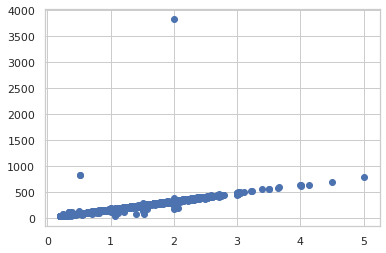

In [25]:
plt.scatter(df1['carat'], df1['volume']) #Plot to check multicollinearity between volume and carat

In [26]:
df= df.drop(['volume'], axis=1)

**USING Inter quartile range (IQR) method**
1. Find the first quartile, Q1.

1.  Find the third quartile, Q3.
2.   Calculate the IQR. IQR= Q3-Q1.
3.Define the normal data range with lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR. 
4. Any data point outside this range is considered as outlier and should be removed for further analysis.

*Using Box plot from seaborn package to visualize outliers*

In [27]:
df.shape

(53920, 4)

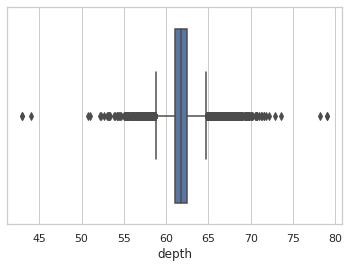

In [28]:
#removing outliers from depth
#Boxplot to visualize outliers in depth column
sns.boxplot(df['depth'])


In [29]:
x=df['depth']

In [30]:
Q1= x.quantile(0.25)
Q3=x.quantile(0.75)
IQR=Q3-Q1
print(Q1,Q3)

61.0 62.5


In [31]:
upperLimit= Q3+1.5*IQR
lowerLimit=Q1-1.5*IQR
print(upperLimit, lowerLimit)

64.75 58.75


In [32]:
#find outliers in depth column
df[df['depth'] > upperLimit]
df[df['depth'] < lowerLimit]

,price,depth,carat,table
2,327,56.9,0.23,65.0
24,353,58.1,0.31,62.0
35,402,58.2,0.23,59.0
43,403,58.4,0.26,63.0
84,554,57.9,0.26,60.0
...,...,...,...,...
53757,2724,55.4,0.72,64.0
53886,2749,58.0,0.70,62.0
53890,2749,57.9,0.73,55.0
53895,2751,57.8,0.70,61.0


In [33]:
#Remove outliers in depth column and obtain a new dataframe
new_df= df[df['depth'] < upperLimit]
new_df= df[df['depth']>lowerLimit]

In [34]:
df.shape

(53920, 4)

Checking the shape to see if the outliers are removed

In [35]:
new_df.shape

(52416, 4)

In [36]:
new_df.head() 

,price,depth,carat,table
0,326,61.5,0.23,55.0
1,326,59.8,0.21,61.0
3,334,62.4,0.29,58.0
4,335,63.3,0.31,58.0
5,336,62.8,0.24,57.0


Remove outliers from carat and table axis

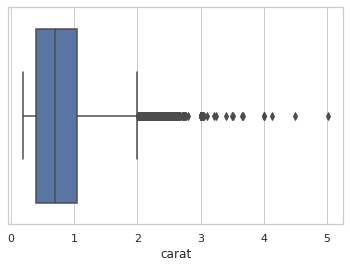

In [37]:
sns.boxplot(df['carat'])

In [38]:
#Remove outliers in carat column
#we can see that the outliers are above the value of 2 carat
#remove all the outliers in carat column above 2
new_df= new_df[new_df['carat'] < 2]


In [39]:
new_df.shape #Noting reduction in size of the data frame after removing the outliers in carat column

(50373, 4)

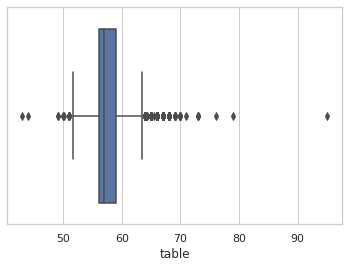

In [40]:
#Boxplot to visualize outliers in table column
sns.boxplot(df['table'])

In [41]:
#Remove outliers in table column
#we can see that the outliers are above the value of 63 and below the value of 52
#retain only the values in the range 52 to 63
new_df= new_df[new_df['table'] < 63]
new_df= new_df[new_df['table'] > 52]

In [42]:
new_df.shape #noting the reduction in number of entries in the dataframe after removing the outliers in table column

(49502, 4)

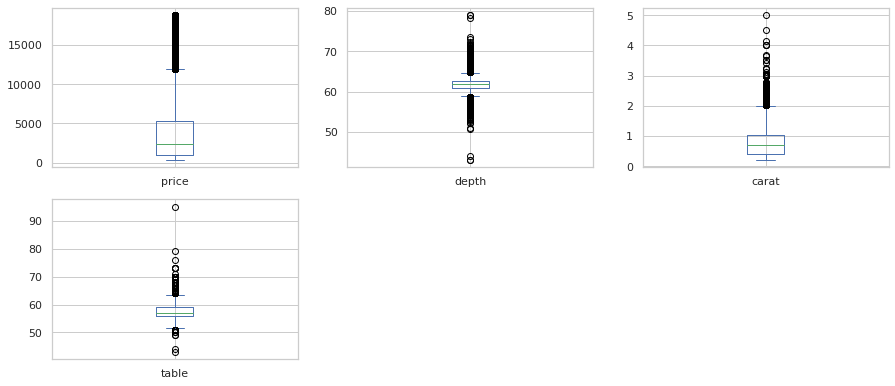

In [43]:
#Code to obtain box plot for all the columns in the data frame
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.show()

In [44]:
new_df.head() # To know the columns in new_df before we start with the regression

,price,depth,carat,table
0,326,61.5,0.23,55.0
1,326,59.8,0.21,61.0
3,334,62.4,0.29,58.0
4,335,63.3,0.31,58.0
5,336,62.8,0.24,57.0


In [45]:
df1=new_df.drop(['price'], axis=1) #creating a dataframe with only independent variables


In [46]:
df1.columns #checking what columns are there in df1

Index(['depth', 'carat', 'table'], dtype='object')

In [47]:
#Define the independent and dependent variables
y= new_df['price'] #dependent variable is price
x= df1

In [48]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [49]:
model = LinearRegression() #Create a linear regression model
model.fit(x_train,y_train) #Fit the data

LinearRegression()

In [50]:
#Predict the value of y based on the test data
y_prediction =  model.predict(x_test)


In [51]:
PricePredict = pd.DataFrame({'Actual price': y_test, 'Predicted price': y_prediction}) #Create a dataframe to display actual and Predicted value
PricePredict


,Actual price,Predicted price
14322,5801,7161.052766
31221,756,366.993389
47802,1901,5169.055326
18651,7617,8150.637173
53591,2699,3282.457196
...,...,...
52114,2462,3438.300780
45427,1669,1838.972017
13081,5416,5648.179725
24239,12443,12768.363566


In [52]:
#Model Evaluation

MSE= (np.sum((y_test-y_prediction)**2))/len(y_test)

In [53]:
print(MSE)
np.sqrt(MSE) #Obtain root means square error

1996134.2182009008


1412.846141022051

In [54]:
#Obtain the intercept and the coefficient
b0= model.intercept_
b1= model.coef_
print(" Equation of the regression line is y_est= {} + {}*x".format(b0,b1))

 Equation of the regression line is y_est= 14634.581781828947 + [-185.14434978 7792.17920437  -95.41731495]*x


In [55]:
#Obtain the r_squared value
print("r_squared value is ", model.score(x,y))

r_squared value is  0.8229464635982046


In [56]:
x = sm.add_constant(x) #This is the intercept that has to be added to create the model

In [57]:
modelNew = sm.OLS(y, x) # create the model
fitted = modelNew.fit() #fit the model

In [58]:
fitted.summary() #Obtain the results of regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 7.669e+04
Date:                Sun, 14 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:00:23   Log-Likelihood:            -4.2912e+05
No. Observations:               49502   AIC:                         8.583e+05
Df Residuals:                   49498   BIC:                         8.583e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.457e+04    409.202     35.602      0.000    1.38e+04    1.54e+04
depth       -182.8029      5.241    -34.878      0.000    -193.076    -172.530
carat       7800.9832     16.408    475.448      0.000    7768.824    7833.142
table        -96.9087      3.373    -28.732      0.000    -103.520     -90.298
==============================================================================
Omnibus:                    19250.009   Durbin-Watson:                   0.679
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148365.633
Skew:                           1.677   Prob(JB):                         0.00
Kurtosis:                      10.790   Cond. No.                     5.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
#Obtain root mean square error
sm.tools.eval_measures.rmse(y_test, y_prediction, axis=0) 


1412.846141022051

CONCLUSION:
82.3% of the variance of the dependent variable being studied(PRICE) is explained by the variance of other independent variables

In this model categorical variables were excluded 